# Data Exploration

Hey! During this first step, please, take a look at the data set and just explore it, find the types of each column and try to find interesting things. Don't worry about data cleaning. Just exploration for now.  
You can answer the following questions:
- How many columns there are
- The type of each column
- The different values that a column can take
- Which do you think are the most important columns? If we are looking at the overall score.

Go wild! (Remember, so far, only exploration).


1. ¿How many columns there are?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
icfesdata = pd.read_csv('Saber_11__2020-2.csv')
icfesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504872 entries, 0 to 504871
Data columns (total 81 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             504872 non-null  object 
 1   ESTU_NACIONALIDAD              504872 non-null  object 
 2   ESTU_GENERO                    504864 non-null  object 
 3   ESTU_FECHANACIMIENTO           504872 non-null  object 
 4   PERIODO                        504872 non-null  int64  
 5   ESTU_CONSECUTIVO               504872 non-null  object 
 6   ESTU_ESTUDIANTE                504872 non-null  object 
 7   ESTU_PAIS_RESIDE               504872 non-null  object 
 8   ESTU_TIENEETNIA                501879 non-null  object 
 9   ESTU_DEPTO_RESIDE              504870 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          504870 non-null  float64
 11  ESTU_MCPIO_RESIDE              504870 non-null  object 
 12  ESTU_COD_RESIDE_MCPIO         

The column ESTU_ETNIA doesn't appears here.

In [3]:
datashape = icfesdata.shape
print('The data contains', datashape[0], 'rows and', datashape[1], 'columns.')

The data contains 504872 rows and 81 columns.


2. The type of each column

In [125]:
icfesdata['FAMI_TIENECOMPUTADOR'].value_counts()

Si    293510
No    191168
Name: FAMI_TIENECOMPUTADOR, dtype: int64

In [4]:
coltypes = dict(icfesdata.dtypes)
#print(coltypes)

In [5]:
# coltypes1 = pd.DataFrame([[key, coltypes[key]] for key in coltypes.keys()], columns=['Columns', 'Type'])
# coltypes1

In [6]:
# coltypes2 = coltypes1.groupby('Type').count()
# print('Of the', datashape[1], 'columns, we have the following number of columns per type of data')
# print(coltypes2)

In [7]:
# coltypesobj = coltypes1[coltypes1['Type'] == object] 
# coltypesint = coltypes1[coltypes1['Type'] == 'int64'] 
# coltypesflt = coltypes1[coltypes1['Type'] == 'float64'] 
# coltypesflt

In [8]:
coltypesobj = icfesdata.select_dtypes(['float64'])
coltypesint = icfesdata.select_dtypes(['int64'])
coltypesflt = icfesdata.select_dtypes(['object'])

3. The different values that a column can take

In [9]:
cols = list(icfesdata.columns)
#print(cols)

In [10]:
for i in cols:
    colvalues = icfesdata[i].value_counts()
    #print(colvalues)

In this part I had some difficulties, because I didn't know how to count the occurrences of each column to know which values were registered in a single instruction. I tried with several functions and cycles, some worked but I got a matrix with a million rows because I counted the values of all the columns in each column, others didn't work and this was the simplest way I could think of but I can't observe the data in such an efficient way, so I must improve it.

I also had the possibility to do it individually for the 82 columns but I decided to do it thinking about the following question.

In [11]:
#col1 = icfesdata['PUNT_GLOBAL'].value_counts()
#col2 = icfesdata['PERCENTIL_GLOBAL'].value_counts()
#col3 = icfesdata['COLE_NATURALEZA'].value_counts()
#col4 = icfesdata['ESTU_TIPOREMUNERACION'].value_counts()
#col5 = icfesdata['FAMI_TIENECOMPUTADOR'].value_counts()
#col6 = icfesdata['FAMI_TIENEINTERNET'].value_counts()
#col7 = icfesdata['FAMI_ESTRATOVIVIENDA'].value_counts()
#col8 = icfesdata['ESTU_DEPTO_RESIDE'].value_counts()
#col9 = icfesdata['ESTU_GENERO'].value_counts()

4. If we look at the overall score, the most important columns are the overall score and overall percentile, along with other columns with which we want to correlate them. These would be the gender, the stratum, whether the student works, whether the student has a computer and whether the student has access to the Internet, if the school is public or private and the department of residence.


In [12]:
icfesdata['PUNT_GLOBAL'].describe()

count    504872.000000
mean        248.347102
std          48.692523
min           0.000000
25%         211.000000
50%         245.000000
75%         282.000000
max         500.000000
Name: PUNT_GLOBAL, dtype: float64

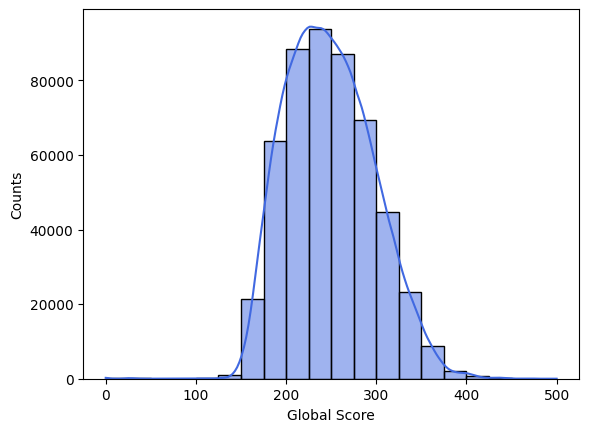

In [13]:
fig1 = sns.histplot(data=icfesdata, x='PUNT_GLOBAL', binwidth=25, kde=True, color='royalblue')
fig1.set(xlabel="Global Score", ylabel = "Counts")
plt.show()

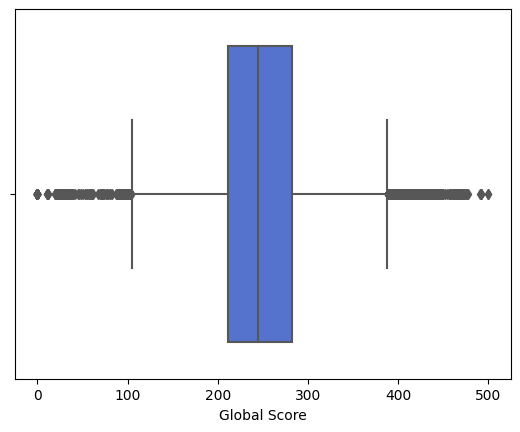

In [14]:
fig2 = sns.boxplot(x=icfesdata["PUNT_GLOBAL"], color='royalblue')
fig2.set(xlabel="Global Score")
plt.show()

In [15]:
colnat=icfesdata['COLE_NATURALEZA'].value_counts()
colnat

OFICIAL       391470
NO OFICIAL    113402
Name: COLE_NATURALEZA, dtype: int64

In [16]:
colnat1 = icfesdata.groupby('COLE_NATURALEZA')['PUNT_GLOBAL'].sum()/icfesdata['COLE_NATURALEZA'].value_counts()
print(colnat1)

NO OFICIAL    270.838486
OFICIAL       241.831742
dtype: float64


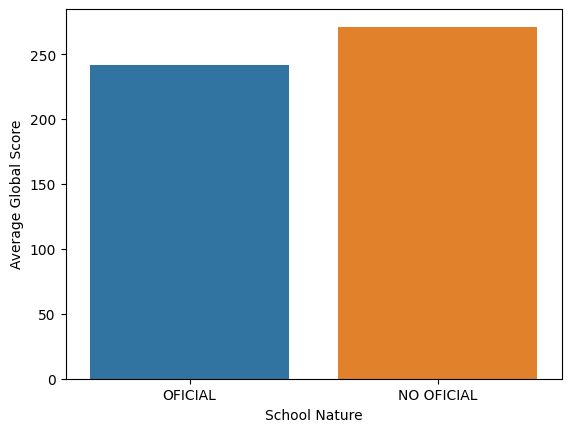

In [17]:
fig3 = sns.barplot(data=icfesdata, x="COLE_NATURALEZA", y="PUNT_GLOBAL")
fig3.set(xlabel="School Nature", ylabel="Average Global Score")
plt.show()

In [18]:
colpuntmat = icfesdata.groupby('COLE_NATURALEZA')['PUNT_MATEMATICAS'].sum()/icfesdata['COLE_NATURALEZA'].value_counts()
print(colpuntmat)
#colpuntmat.plot.bar(xlabel='Nature of the school', ylabel='Average maths score')

NO OFICIAL    55.430425
OFICIAL       49.742059
dtype: float64


In [19]:
colpunteng = icfesdata.groupby('COLE_NATURALEZA')['PUNT_INGLES'].sum()/icfesdata['COLE_NATURALEZA'].value_counts()
print(colpunteng)
#colpunteng.plot.bar(xlabel='Nature of the school', ylabel='Average english score')

NO OFICIAL    53.127396
OFICIAL       45.034761
dtype: float64


In [20]:
colpuntsoc = icfesdata.groupby('COLE_NATURALEZA')['PUNT_SOCIALES_CIUDADANAS'].sum()/icfesdata['COLE_NATURALEZA'].value_counts()
print(colpuntsoc)
#colpuntsoc.plot.bar(xlabel='Nature of the school', ylabel='Average social sciences score')

NO OFICIAL    53.172396
OFICIAL       46.803354
dtype: float64


In [21]:
colpuntlec = icfesdata.groupby('COLE_NATURALEZA')['PUNT_LECTURA_CRITICA'].sum()/icfesdata['COLE_NATURALEZA'].value_counts()
print(colpuntlec)
#colpuntmat.plot.bar(xlabel='Nature of the school', ylabel='Average critical reading score')

NO OFICIAL    56.080501
OFICIAL       51.020152
dtype: float64


In [22]:
colpuntcnat = icfesdata.groupby('COLE_NATURALEZA')['PUNT_C_NATURALES'].sum()/icfesdata['COLE_NATURALEZA'].value_counts()
print(colpuntcnat)
#colpuntmat.plot.bar(xlabel='Nature of the school', ylabel='Average natural sciences score')

NO OFICIAL    52.333230
OFICIAL       46.999287
dtype: float64


# Insights

+ The overall score has a Gaussian distribution with a mean of 246.18 and a standard deviation of 51.38 points. 
+ In 2019, the maximum score was 477 and the minimum score was 0.
+ Of the 546212 students who took the exam 416011 belong to public or official institutions and 130201 belong to private or unofficial institutions.
+ The average global score in the public institutions was below the average with 240.80 points, while the average global score in the private institutions was 263.39 points. So there's a difference of 8.57% between the average global scores of private and public institutions.
+ Five areas of knowledge are evaluated: mathematics, English, critical reading, natural sciences and social sciences. In all five areas, the average score is higher in private institutions. The area with the greatest percentage difference is English, with 13.8% between private and public institutions.


# Data Cleaning

The following columns with different codes are irrelevant.

In [23]:
icfesdata1 = icfesdata.drop(['ESTU_TIPODOCUMENTO', 'PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 
                             'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 'COLE_CODIGO_ICFES',
                             'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE','COLE_COD_MCPIO_UBICACION',
                             'COLE_COD_DEPTO_UBICACION', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION',
                             'ESTU_NSE_ESTABLECIMIENTO', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL',
                             'COLE_NOMBRE_SEDE', 'COLE_SEDE_PRINCIPAL','ESTU_ESTADOINVESTIGACION'],
                            axis=1)

In [24]:
icfesdata1.info()
#icfesdata1 is the dataframe without irrelevant columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504872 entries, 0 to 504871
Data columns (total 62 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_NACIONALIDAD              504872 non-null  object 
 1   ESTU_GENERO                    504864 non-null  object 
 2   ESTU_FECHANACIMIENTO           504872 non-null  object 
 3   ESTU_PAIS_RESIDE               504872 non-null  object 
 4   ESTU_TIENEETNIA                501879 non-null  object 
 5   ESTU_DEPTO_RESIDE              504870 non-null  object 
 6   ESTU_MCPIO_RESIDE              504870 non-null  object 
 7   FAMI_ESTRATOVIVIENDA           487920 non-null  object 
 8   FAMI_PERSONASHOGAR             489699 non-null  object 
 9   FAMI_CUARTOSHOGAR              489033 non-null  object 
 10  FAMI_EDUCACIONPADRE            491882 non-null  object 
 11  FAMI_EDUCACIONMADRE            491386 non-null  object 
 12  FAMI_TRABAJOLABORPADRE        

Looking for missing values in columns and rows.

In [25]:
missing_columns=icfesdata1.isnull().sum()
missing_rows=icfesdata1.isnull().sum(axis = 1)

In [26]:
icfesdata1.isnull().any(axis=1).sum()

133046

We could directly delete these 56651 rows which are equivalent to 10.37% of the dataset rows, but for example for the column 'ESTU_DEDICACIONINTERNET' you could replace some NaN by -.

In [27]:
icfesdata1['ESTU_DEDICACIONINTERNET'].value_counts()

Entre 1 y 3 horas        150557
Más de 3 horas           134493
Entre 30 y 60 minutos    109723
30 minutos o menos        66563
No Navega Internet        28910
Name: ESTU_DEDICACIONINTERNET, dtype: int64

In [28]:
icfesdata2=icfesdata1.replace({'ESTU_DEDICACIONINTERNET':{np.nan:'-'}})
#icfesdata2 is the dataframe with replacement in one column 'ESTU_DEDICACIONINTERNET'

In [29]:
icfesdata2['ESTU_DEDICACIONINTERNET'].value_counts()

Entre 1 y 3 horas        150557
Más de 3 horas           134493
Entre 30 y 60 minutos    109723
30 minutos o menos        66563
No Navega Internet        28910
-                         14626
Name: ESTU_DEDICACIONINTERNET, dtype: int64

Finally, I delete 133046 rows.

In [30]:
icfesready=icfesdata2.dropna()
#icfesready is the dataframe eliminating 10,37% of the columns

And check that there isn´t missing values.

In [31]:
icfesready.isnull().any(axis=1).sum()

0

BACK TO DATA CLEANING :(

In [32]:
icfesdata1['FAMI_TIENECOMPUTADOR'].value_counts()

Si    293510
No    191168
Name: FAMI_TIENECOMPUTADOR, dtype: int64

In [33]:
icfesdata1['FAMI_TIENEINTERNET'].value_counts()

Si    342825
No    148382
Name: FAMI_TIENEINTERNET, dtype: int64

In [79]:
icfesdata3=icfesdata1.replace({'ESTU_DEDICACIONINTERNET':{np.nan:'-'}, 'FAMI_COMECEREALFRUTOSLEGUMBRE':{np.nan:'-'},
                              'FAMI_COMELECHEDERIVADOS':{np.nan:'-'},'FAMI_TIENESERVICIOTV':{np.nan:'-'},
                              'FAMI_EDUCACIONMADRE':{np.nan:'-'},'ESTU_TIPOREMUNERACION':{np.nan:'-'},
                              'COLE_CARACTER':{np.nan:'-'},'FAMI_COMECARNEPESCADOHUEVO':{np.nan:'-'},
                              'ESTU_DEDICACIONLECTURADIARIA':{np.nan:'-'},'FAMI_NUMLIBROS':{np.nan:'-'},
                              'FAMI_TIENEHORNOMICROOGAS':{np.nan:'-'},'FAMI_PERSONASHOGAR':{np.nan:'-'},
                              'FAMI_TIENEINTERNET':{np.nan:'-'},'FAMI_EDUCACIONPADRE':{np.nan:'-'},
                              'FAMI_SITUACIONECONOMICA':{np.nan:'-'},'FAMI_TIENEAUTOMOVIL':{np.nan:'-'},
                              'FAMI_TIENECOMPUTADOR':{np.nan:'-'},'FAMI_TRABAJOLABORPADRE':{np.nan:'-'},
                              'FAMI_TIENECONSOLAVIDEOJUEGOS':{np.nan:'-'},'FAMI_TIENELAVADORA':{np.nan:'-'},
                              'FAMI_CUARTOSHOGAR':{np.nan:'-'},'FAMI_TIENEMOTOCICLETA':{np.nan:'-'},
                              'FAMI_TRABAJOLABORMADRE':{np.nan:'-'}, 'ESTU_HORASSEMANATRABAJA':{np.nan:'-'},
                              'COLE_BILINGUE':{np.nan:'-'}, 'FAMI_ESTRATOVIVIENDA':{np.nan:'Sin estrato'}}
                              )

In [80]:
icfesdata3.isnull().any(axis=1).sum()
#icfesdata3 is the dataframe without irrelevant columns and replacement of nan to - in
#24 columns type obj that represents socioeconomical variables

3444

In [82]:
missing_columns1 = icfesdata3.isnull().sum()

In [83]:
icfesclean=icfesdata3.dropna()
#icfesclean is the dataframe without missing values after 
#replacement in 24 columns and eliminating 0,07% of the rows

In [84]:
icfesclean.isnull().any(axis=1).sum()

0

# Data Exploration with ready dataset

In [86]:
# icfesready['PUNT_GLOBAL'].describe()

In [87]:
# fig1 = sns.histplot(data=icfesdata, x='PUNT_GLOBAL', binwidth=25, kde=True, color='mediumpurple')
# fig1.set(xlabel="Global Score", ylabel = "Counts")
# plt.show()

In [88]:
# fig2 = sns.boxplot(x=icfesready["PUNT_GLOBAL"], color='mediumpurple')
# fig2.set(xlabel="Global Score")
# plt.show()

In [89]:
# colnat=icfesready['COLE_NATURALEZA'].value_counts()
# colnat

In [90]:
# colnat1 = icfesready.groupby('COLE_NATURALEZA')['PUNT_GLOBAL'].sum()/icfesready['COLE_NATURALEZA'].value_counts()
# print(colnat1)

In [91]:
# fig3 = sns.barplot(data=icfesready, x="COLE_NATURALEZA", y="PUNT_GLOBAL")
# fig3.set(xlabel="School Nature", ylabel="Average Global Score")
# plt.show()

In [92]:
# colpuntmat = icfesready.groupby('COLE_NATURALEZA')['PUNT_MATEMATICAS'].sum()/icfesready['COLE_NATURALEZA'].value_counts()
# print(colpuntmat)

In [93]:
# colpunteng = icfesready.groupby('COLE_NATURALEZA')['PUNT_INGLES'].sum()/icfesready['COLE_NATURALEZA'].value_counts()
# print(colpunteng)

In [94]:
# colpuntlec = icfesready.groupby('COLE_NATURALEZA')['PUNT_LECTURA_CRITICA'].sum()/icfesready['COLE_NATURALEZA'].value_counts()
# print(colpuntlec)

In [95]:
# colpuntsoc = icfesready.groupby('COLE_NATURALEZA')['PUNT_SOCIALES_CIUDADANAS'].sum()/icfesready['COLE_NATURALEZA'].value_counts()
# print(colpuntsoc)

In [96]:
# colpuntcnat = icfesready.groupby('COLE_NATURALEZA')['PUNT_C_NATURALES'].sum()/icfesready['COLE_NATURALEZA'].value_counts()
# print(colpuntcnat)

In [97]:
# fig4 = sns.barplot(data=icfesready, x="COLE_NATURALEZA",  y="PUNT_GLOBAL", hue="FAMI_TIENECOMPUTADOR")
# fig4.set(xlabel="School Nature", ylabel="Average Global Score")
# plt.show()

In [98]:
# fig5 = sns.barplot(data=icfesready, x="COLE_NATURALEZA",  y="PUNT_GLOBAL", hue="FAMI_TIENEINTERNET")
# fig5.set(xlabel="School Nature", ylabel="Average Global Score")
# plt.show()

In [99]:
# sns.histplot(data=icfesready, x="FAMI_TIENECOMPUTADOR", hue="COLE_NATURALEZA", multiple="stack")

In [100]:
# icfesdatanum=icfesready.select_dtypes(['int64'])

In [101]:
# corr = icfesready.corr()
# plt.subplots(figsize=(15,10))
# sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, annot=True)

By deleting 56557 rows, the lower overall scores from 0 to 107 were deleted.

In [102]:
icfescero=icfesdata1[icfesdata1['PUNT_GLOBAL'] <= 107]
datashape = icfescero.shape
print('The data contains', datashape[0], 'rows and', datashape[1], 'columns.')

The data contains 254 rows and 62 columns.


¡GO BACK TO DATA CLEANING!

# Data exploring with clean dataset

In [124]:
icfesclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501428 entries, 0 to 504871
Data columns (total 62 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_NACIONALIDAD              501428 non-null  object 
 1   ESTU_GENERO                    501428 non-null  object 
 2   ESTU_FECHANACIMIENTO           501428 non-null  object 
 3   ESTU_PAIS_RESIDE               501428 non-null  object 
 4   ESTU_TIENEETNIA                501428 non-null  object 
 5   ESTU_DEPTO_RESIDE              501428 non-null  object 
 6   ESTU_MCPIO_RESIDE              501428 non-null  object 
 7   FAMI_ESTRATOVIVIENDA           501428 non-null  object 
 8   FAMI_PERSONASHOGAR             501428 non-null  object 
 9   FAMI_CUARTOSHOGAR              501428 non-null  object 
 10  FAMI_EDUCACIONPADRE            501428 non-null  object 
 11  FAMI_EDUCACIONMADRE            501428 non-null  object 
 12  FAMI_TRABAJOLABORPADRE        

In [103]:
icfesclean['PUNT_GLOBAL'].describe()

count    501428.000000
mean        248.438683
std          48.683068
min           0.000000
25%         211.000000
50%         245.000000
75%         282.000000
max         500.000000
Name: PUNT_GLOBAL, dtype: float64

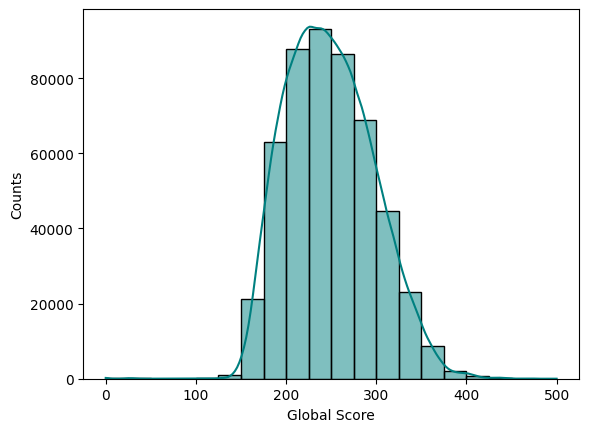

In [104]:
fig1 = sns.histplot(data=icfesclean, x='PUNT_GLOBAL', binwidth=25, kde=True, color='teal')
fig1.set(xlabel="Global Score", ylabel = "Counts")
plt.show()

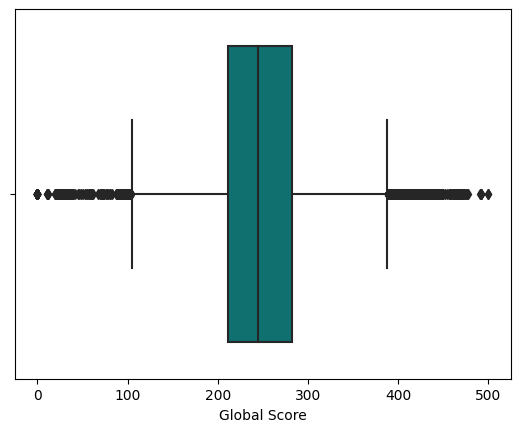

In [105]:
fig2 = sns.boxplot(x=icfesclean["PUNT_GLOBAL"], color='teal')
fig2.set(xlabel="Global Score")
plt.show()

In [106]:
colnat=icfesclean['COLE_NATURALEZA'].value_counts()
colnat

OFICIAL       390047
NO OFICIAL    111381
Name: COLE_NATURALEZA, dtype: int64

In [107]:
colnat1 = icfesclean.groupby('COLE_NATURALEZA')['PUNT_GLOBAL'].sum()/icfesclean['COLE_NATURALEZA'].value_counts()
print(colnat1)

NO OFICIAL    271.328449
OFICIAL       241.902330
dtype: float64


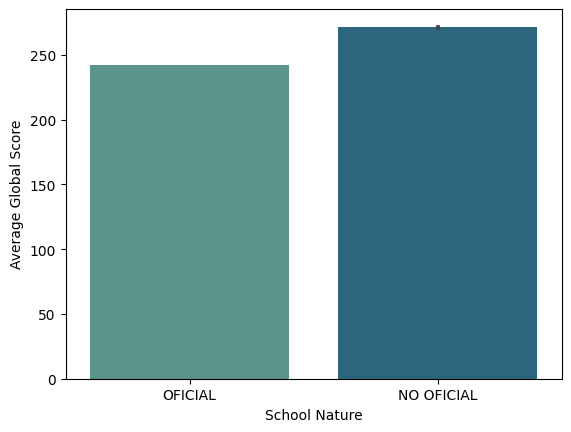

In [108]:
fig3 = sns.barplot(data=icfesclean, x="COLE_NATURALEZA", y="PUNT_GLOBAL", palette='crest')
fig3.set(xlabel="School Nature", ylabel="Average Global Score")
plt.show()

In [109]:
colpuntmat = icfesclean.groupby('COLE_NATURALEZA')['PUNT_MATEMATICAS'].sum()/icfesclean['COLE_NATURALEZA'].value_counts()
print(colpuntmat)

NO OFICIAL    55.532407
OFICIAL       49.755432
dtype: float64


In [110]:
colpunteng = icfesclean.groupby('COLE_NATURALEZA')['PUNT_INGLES'].sum()/icfesclean['COLE_NATURALEZA'].value_counts()
print(colpunteng)

NO OFICIAL    53.240364
OFICIAL       45.078739
dtype: float64


In [111]:
colpuntlec = icfesclean.groupby('COLE_NATURALEZA')['PUNT_LECTURA_CRITICA'].sum()/icfesclean['COLE_NATURALEZA'].value_counts()
print(colpuntlec)

NO OFICIAL    56.160476
OFICIAL       51.034450
dtype: float64


In [112]:
colpuntsoc = icfesclean.groupby('COLE_NATURALEZA')['PUNT_SOCIALES_CIUDADANAS'].sum()/icfesclean['COLE_NATURALEZA'].value_counts()
print(colpuntsoc)

NO OFICIAL    53.273215
OFICIAL       46.818463
dtype: float64


In [113]:
colpuntcnat = icfesclean.groupby('COLE_NATURALEZA')['PUNT_C_NATURALES'].sum()/icfesclean['COLE_NATURALEZA'].value_counts()
print(colpuntcnat)

NO OFICIAL    52.438001
OFICIAL       47.013960
dtype: float64


In [114]:
puntajes = icfesclean[{'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 
                       'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL'}]

C:\Users\ynino\AppData\Local\Temp\ipykernel_18728\2369097394.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  puntajes = icfesclean[{'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES',


<Axes: >

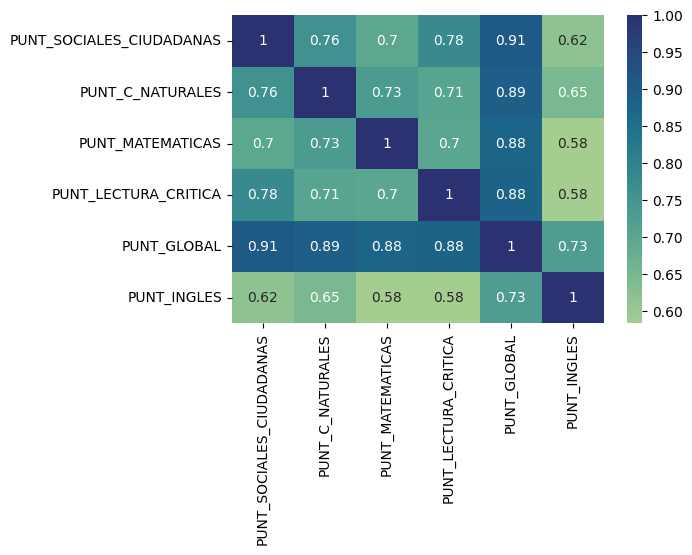

In [115]:
corr = puntajes.corr()
plt.subplots(figsize=(6,4))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, annot=True, cmap='crest')

In [116]:
icfesclean.groupby('COLE_NATURALEZA')['FAMI_TIENECOMPUTADOR'].value_counts()

COLE_NATURALEZA  FAMI_TIENECOMPUTADOR
NO OFICIAL       Si                       89803
                 No                       16787
                 -                         4791
OFICIAL          Si                      201787
                 No                      173189
                 -                        15071
Name: FAMI_TIENECOMPUTADOR, dtype: int64

In [117]:
icfesclean.groupby(['COLE_NATURALEZA','FAMI_TIENECOMPUTADOR'])['PUNT_GLOBAL'].mean()
#/icfesclean['COLE_NATURALEZA'].value_counts()


COLE_NATURALEZA  FAMI_TIENECOMPUTADOR
NO OFICIAL       -                       253.533918
                 No                      234.565497
                 Si                      279.149939
OFICIAL          -                       232.863048
                 No                      229.737789
                 Si                      253.017989
Name: PUNT_GLOBAL, dtype: float64

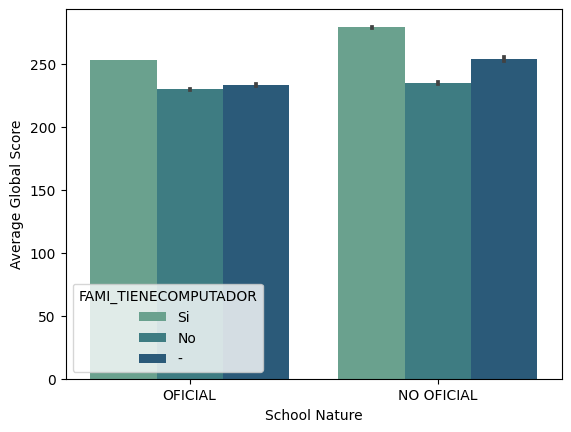

In [118]:
fig4 = sns.barplot(data=icfesclean, x="COLE_NATURALEZA",  y="PUNT_GLOBAL", 
                   hue="FAMI_TIENECOMPUTADOR", palette='crest')
fig4.set(xlabel="School Nature", ylabel="Average Global Score")
#for i in fig4.containers:
#    fig4.bar_label(i,)
plt.show()

In [119]:
icfesclean.groupby('COLE_NATURALEZA')['FAMI_TIENEINTERNET'].value_counts()

COLE_NATURALEZA  FAMI_TIENEINTERNET
NO OFICIAL       Si                     98195
                 No                      9800
                 -                       3386
OFICIAL          Si                    242362
                 No                    137678
                 -                      10007
Name: FAMI_TIENEINTERNET, dtype: int64

In [120]:
icfesclean.groupby(['COLE_NATURALEZA','FAMI_TIENEINTERNET'])['PUNT_GLOBAL'].mean()

COLE_NATURALEZA  FAMI_TIENEINTERNET
NO OFICIAL       -                     250.401949
                 No                    228.908980
                 Si                    276.283568
OFICIAL          -                     231.513740
                 No                    226.210005
                 Si                    251.245571
Name: PUNT_GLOBAL, dtype: float64

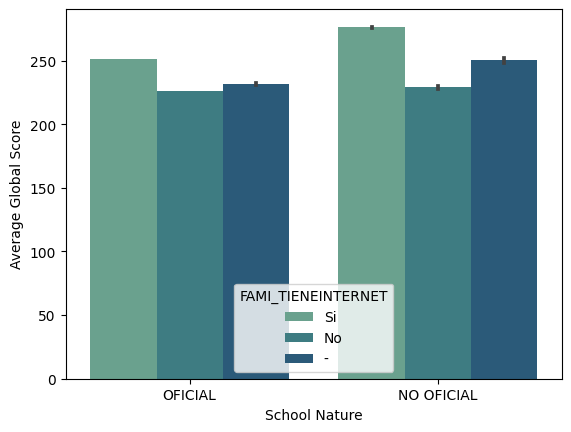

In [121]:
fig5 = sns.barplot(data=icfesclean, x="COLE_NATURALEZA",  y="PUNT_GLOBAL", 
                   hue="FAMI_TIENEINTERNET", palette='crest')
fig5.set(xlabel="School Nature", ylabel="Average Global Score")
plt.show()

In [122]:
icfesclean.groupby(['COLE_NATURALEZA','FAMI_ESTRATOVIVIENDA'])['PUNT_GLOBAL'].mean()

COLE_NATURALEZA  FAMI_ESTRATOVIVIENDA
NO OFICIAL       Estrato 1               243.154093
                 Estrato 2               262.719820
                 Estrato 3               278.996649
                 Estrato 4               296.392203
                 Estrato 5               300.840334
                 Estrato 6               297.916921
                 Sin Estrato             227.557090
                 Sin estrato             252.061121
OFICIAL          Estrato 1               236.395810
                 Estrato 2               247.523949
                 Estrato 3               252.887942
                 Estrato 4               238.600000
                 Estrato 5               217.136639
                 Estrato 6               202.888654
                 Sin Estrato             208.316740
                 Sin estrato             230.812937
Name: PUNT_GLOBAL, dtype: float64

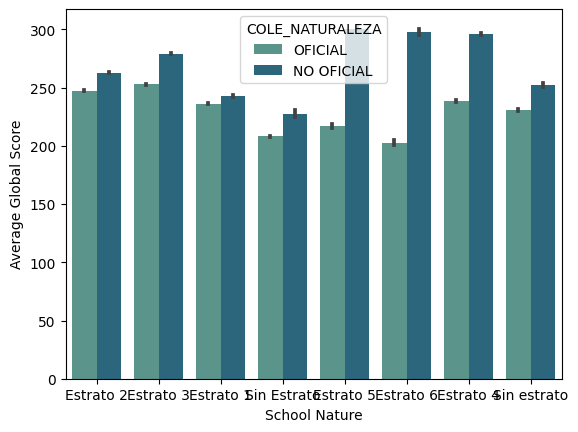

In [123]:
fig6 = sns.barplot(data=icfesclean, x="FAMI_ESTRATOVIVIENDA",  y="PUNT_GLOBAL", 
                   hue="COLE_NATURALEZA", palette='crest')
fig6.set(xlabel="School Nature", ylabel="Average Global Score")
plt.show()